It's a notebook where I just try to play with a dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I want to explore some data. Let's use data about Tourism and Economic Impact Dataset that is available here: https://www.kaggle.com/datasets/bushraqurban/tourism-and-economic-impact
I've downloaded it into data folder

In [2]:
df = pd.read_csv('data/world_tourism_economy_data.csv')
df.head(10)
len(df)

6650

I want to visualize some data. Let's plot country name along with gdp and tourism receipts. Next I want to plot how much % of gdp consists of tourism

But to do that I need to learn basic of matplotlib

In [3]:
tdf = df[df.country != 'World']
tdf[['country', 'gdp', 'tourism_receipts']].sort_values(by='gdp', ascending=False).head(5)

,country,gdp,tourism_receipts
6479,High income,6.827649e+13,NaN
6213,High income,6.496126e+13,NaN
6565,OECD members,6.474656e+13,NaN
5947,High income,6.273789e+13,NaN
6299,OECD members,6.069133e+13,NaN


There are many rows with country value which's not a country. I want to fix it using some file with all countries in the world.

I want to turn country list into convenient csv file, and then into pandas dataframe

In [4]:
with open('data/all_countries_in_the_world.txt') as src, open('data/all_countries_in_the_world.csv', 'w') as dest:
    for line in src:
        stripped_line = line.strip()
        if stripped_line:
            dest.write(stripped_line + ',')
countries = pd.read_csv('data/all_countries_in_the_world.csv')

In [5]:
countries

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Vatican City (Holy See),Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Unnamed: 201


consider only those years where's data about tourism receipts

In [6]:
dtoplt = df[['country', 'gdp', 'tourism_receipts', 'year']] #data to plot
dtoplt = dtoplt[
    (dtoplt['country'].isin(countries)) &
    (dtoplt['tourism_receipts'].notna())
].sort_values(by='gdp', ascending=False)
len(dtoplt)

2829

Handle NaN gdp values. Let's put into it gdp from a year before

In [7]:
#find other rows and take that with year closest to year of row where we have NaN gdp
def fix_nan_gdp(country):

    country_data = dtoplt[dtoplt['country'] == country]

    nan_gdp_rows = country_data[country_data['gdp'].isna()]
    non_nan_gdp_rows = country_data[~country_data['gdp'].isna()]
    if not nan_gdp_rows.empty and not non_nan_gdp_rows.empty:
        nan_years = nan_gdp_rows['year'].to_numpy()
        non_nan_years = non_nan_gdp_rows['year'].to_numpy()

        closest_years = np.abs(nan_years[:, None] - non_nan_years).argmin(axis=1)
        closest_gdp_vals = non_nan_gdp_rows.iloc[closest_years]['gdp'].to_numpy()
        dtoplt.loc[(dtoplt['country'] == country) & (dtoplt['gdp'].isna()), 'gdp'] = closest_gdp_vals

fix_nan_gdp('South Sudan')
fix_nan_gdp('Eritrea')



In [32]:
dtoplt['gdp'].head(3)


3577    6.272363e+12
3311    6.233147e+12
3045    5.759072e+12
Name: gdp, dtype: float64


Let's plot top 20 countries by tourism receipts along with GDP

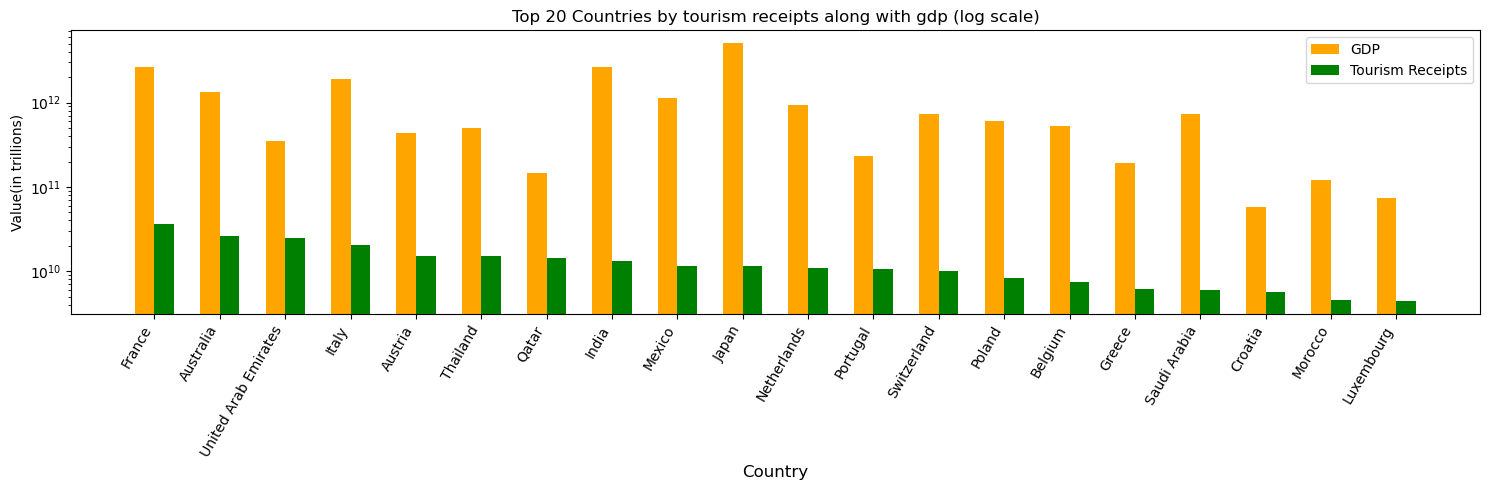

In [61]:
top_20_countries = dtoplt[dtoplt['year'] == 2020].nlargest(20, 'tourism_receipts').sort_values(by='tourism_receipts', ascending=False)

plt.figure(figsize=(15,5))

x=np.arange(len(top_20_countries))
width=0.3

plt.bar(x - width / 2, top_20_countries['gdp'], width=width, label='GDP', color='orange')
plt.bar(x + width / 2, top_20_countries['tourism_receipts'], width=width, label='Tourism Receipts', color='green')


plt.xlabel('Country', fontsize=12)
plt.xticks(x, top_20_countries['country'], fontsize=10)  # Align country names with grouped bars
plt.xticks(rotation=60, ha='right')
plt.ylabel('Value(in trillions)')

plt.title('Top 20 Countries by tourism receipts along with gdp (log scale)')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()